# Voronoi Mesh

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.voronoi_plot_2d.html

Simple plotting of center points of mesh data, using scipy to construct the corresponding Voronoi mesh.


In [1]:
def voronoi_volumes(points):
    """
    https://stackoverflow.com/questions/19634993/volume-of-voronoi-cell-python
    """
    v = Voronoi(points)
    vol = np.zeros(v.npoints)
    for i, reg_num in enumerate(v.point_region):
        indices = v.regions[reg_num]
        if -1 in indices: # some regions can be opened
            vol[i] = np.inf
        else:
            vol[i] = ConvexHull(v.vertices[indices]).volume
            print ConvexHull(v.vertices[indices]).equations
    return vol

vertices: 
positions of all voronoi cell vertices (order corresponds to vertex ID)
[[ 1.60789474  0.75      ]
 [-1.30592965 -0.4818593 ]
 [ 0.94756742 -0.50462189]
 [-1.8716756   2.1233378 ]
 [-1.23521627  0.22244593]
 [ 0.875       0.75      ]]
regions: 
indices of voronoi vertices for each voronoi cell
[[], [2, -1, 1], [2, 0, -1], [5, 3, 4], [5, 0, -1, 3], [4, 1, -1, 3], [5, 0, 2, 1, 4]]
points: 
voronoi cell centers
[[ 0.    0.  ]
 [ 0.    1.5 ]
 [-0.01 -0.99]
 [-2.49  0.25]
 [-0.25  1.  ]
 [ 1.9  -1.  ]]
point region: 
index of vor.region corresponding to vor.points
[6 4 1 5 3 2]
[[-0.01010049 -0.99994899 -0.49502525]
 [ 0.88491822 -0.46574643 -1.07354553]
 [-0.99499755  0.09989935 -1.25125937]
 [-0.          1.         -0.75      ]
 [-0.24253563  0.9701425  -0.5153882 ]]
[[ 0.4472136   0.89442719 -1.06213229]
 [-0.94825912 -0.31749747 -1.10067907]
 [ 0.24253563 -0.9701425   0.5153882 ]]
voulme: 
same order as vor.points
[ 2.59703597         inf         inf         inf  2.17352983 

/Users/sean/anaconda2/lib/python2.7/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = getattr(ax, 'ishold', lambda: True)()


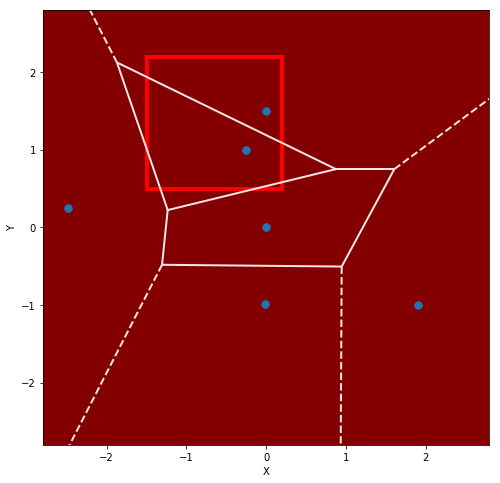

In [2]:
import numpy as np
import matplotlib
#matplotlib.use('agg')
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
points = np.array([[0.0,0.0], [0, 1.5], [-0.01, -0.99], [-2.49, 0.25], [-0.25, 1.0], [1.9, -1.0]])
from scipy.spatial import Voronoi, ConvexHull, voronoi_plot_2d
vor = Voronoi(points)
print "vertices: \npositions of all voronoi cell vertices (order corresponds to vertex ID)\n", vor.vertices
print "regions: \nindices of voronoi vertices for each voronoi cell\n", vor.regions
print "points: \nvoronoi cell centers\n", vor.points
#print "ridge verticies\n", vor.ridge_vertices
#print "ridge points\n", vor.ridge_points
print "point region: \nindex of vor.region corresponding to vor.points\n", vor.point_region
volume = voronoi_volumes(points)
print "voulme: \nsame order as vor.points\n", volume
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_facecolor('xkcd:dark red')
fig = voronoi_plot_2d(vor,ax,show_vertices=False,line_colors='white',line_width=2, line_alpha=0.9, point_size=15)
plt.gca().add_patch(Rectangle((-1.5,0.5),1.7,1.7,
                    edgecolor='red',
                    facecolor='none',
                    lw=4))
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2.8,2.8)
plt.ylim(-2.8,2.8)
plt.show()
plt.close()

[1.0902634230357908, 0.038392940036089666]


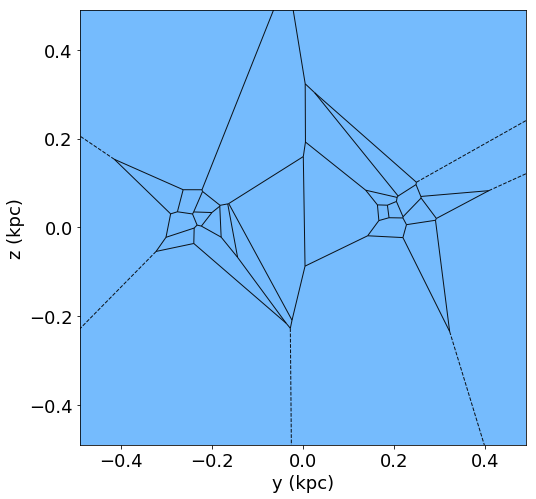

In [59]:
import random
def gauss_2d(mu, sigma):
    x = random.gauss(mu, sigma)
    y = random.gauss(0.02, sigma)
    list_ = []
    list_.append(x)
    list_.append(y)
    return list_
z=gauss_2d(1.0,0.1)
print z
sigma = 0.05
mu = 0.22
random.seed(101)
#points = np.array([[0.0,0.0], [0, 1.5], [-0.01, -0.99], [-2.49, 0.25], [-0.25, 1.0], [1.9, -1.0]])
points = np.array([gauss_2d(mu,sigma),gauss_2d(mu,sigma),gauss_2d(mu,sigma),gauss_2d(mu,sigma),gauss_2d(mu,sigma),
                   gauss_2d(mu,sigma),gauss_2d(mu,sigma),gauss_2d(mu,sigma),gauss_2d(mu,sigma),gauss_2d(mu,sigma),
                   gauss_2d(mu,sigma),gauss_2d(mu,sigma),gauss_2d(mu,sigma),gauss_2d(mu,sigma),gauss_2d(mu,sigma),
                  gauss_2d(-1.0*mu,sigma),gauss_2d(-1.0*mu,sigma),gauss_2d(-1.0*mu,sigma),gauss_2d(-1.*mu,sigma),gauss_2d(-1.*mu,sigma),
                   gauss_2d(-1.0*mu,sigma),gauss_2d(-1.0*mu,sigma),gauss_2d(-1.0*mu,sigma),gauss_2d(-1.*mu,sigma),gauss_2d(-1.*mu,sigma),
                  gauss_2d(-1.0*mu,sigma),gauss_2d(-1.0*mu,sigma),gauss_2d(-1.0*mu,sigma),gauss_2d(-1.*mu,sigma),gauss_2d(-1.*mu,sigma)])
from scipy.spatial import Voronoi, ConvexHull, voronoi_plot_2d
vor = Voronoi(points, furthest_site=False, qhull_options="Qbb Qc Qz Gc")

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_facecolor('xkcd:sky blue')
fig = voronoi_plot_2d(vor,ax,show_vertices=False,line_colors='black',line_width=1, line_alpha=0.9, point_size=0.001)

plt.xlabel('y (kpc)')
plt.ylabel('z (kpc)')
plt.xlim(-0.49,0.49)
plt.ylim(-0.49,0.49)
plt.show()
plt.close()

# 3d Voronoi Mesh

In [3]:
points = np.array([[0, 1.5, 1.0], [-0.01, -0.99, -1.0], [-2.49, 0.25, 1.0], [-0.25, 1.0, -1.0]])
vor = Voronoi(points)
vor.vertices

array([[-0.76953331, -0.07212965,  0.41109908]])

# Interpolate mesh from points from AREPO hdf5

I want to read in mesh points from an AREPO output file to reconstruct the voronoi mesh in python in a KDTree. This way, I can query each cell in a FLASH grid and fill it with the appropriate intrinsic field values (density, temperature, pressure) for whichever mesh the cell center falls in.

scipy.interpolate.NearestNDInterpolator
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.NearestNDInterpolator.html
* https://github.com/scipy/scipy/blob/v1.7.1/scipy/interpolate/ndgriddata.py#L20-L111

Steps:
1. Read in AREPO snapshot (~9 million points)
2. Use scipy NearestNDInterpolator to construct mesh and get a field value for 512 grid points (mimicking a FLASH block). Un-modified, NearestNDInterpolator will regenerate the mesh from scratch for each point.
3. Time this process. If it takes longer than 1/1000th of a day (1.5 minutes), then we need to modify.

In [ ]:
from scipy.interpolate import NearestNDInterpolator
import matplotlib.pyplot as plt
%matplotlib notebook
import h5py
import numpy as np
import time

In [ ]:
def gen_kdtree(data_coords, field_set):
    nearest_interp = NearestNDInterpolator(list(zip(data_coords[0], data_coords[1], data_coords[2])), field_set)
    return nearest_interp
def interp_data_new(interp, cell_coords):
    interp_result = interp(cell_coords[0], cell_coords[1], cell_coords[2])
    return interp_result
def gen_cell_coords(x,y,z):
    cellX = np.linspace(min(x), max(x), num=512)*np.random.random()
    cellY = np.linspace(min(y), max(y), num=512)*np.random.random()
    cellZ = np.linspace(min(z), max(z), num=512)*np.random.random()
    cell_coords = [cellX,cellY,cellZ]
    return cell_coords
def interp_data(data_coords, cell_coords, field_set):
    """
    Generates Nearest Neighbor object with given field values assigned to input data coords.
    For a set of sample data points, return interpolated field values.
    
    Inputs:
    data_coords - coordinates of AREPO mesh cells
    cell_coords - coordinates of FLASH cell centers
    field_set   - AREPO field data
    
    Output:
    interp_result - interpolated data at each FLASH cell center
    """
    interp = NearestNDInterpolator(list(zip(data_coords[0], data_coords[1], data_coords[2])), field_set)
    interp_result = interp(cell_coords[0], cell_coords[1], cell_coords[2])
    return interp_result

In [ ]:
f = h5py.File('../../AREPO-TORCH/snapshot_550_9.hdf5','r')
coords_set = np.array(f["PartType0"]["Coordinates"])
x = coords_set[:,0]
y = coords_set[:,1]
z = coords_set[:,2]
points = np.zeros(len(x), dtype=object)
for i,point in enumerate(points):
    xyz = []
    xyz.append(float(x[i]))
    xyz.append(float(y[i]))
    xyz.append(float(z[i]))
    xyz = np.array(xyz)
    points[i] = xyz
print points[0]
vor = Voronoi(points)

In [ ]:
print len(vor.)

In [ ]:
time_start = time.time()
f = h5py.File('../../AREPO-TORCH/snapshot_550_9.hdf5','r')
coords_set = np.array(f["PartType0"]["Coordinates"])
x = coords_set[:,0]
y = coords_set[:,1]
z = coords_set[:,2]
data_coords = [x,y,z]

density_set = np.array(f["PartType0"]["Density"])
velocity_set = np.array(f["PartType0"]["Velocities"])
velx = velocity_set[:,0]
vely = velocity_set[:,1]
velz = velocity_set[:,2]
time1 = time.time()
print("file data extracted", time1-time_start)
cell_coords0 = gen_cell_coords(x,y,z)
cell_coords1 = gen_cell_coords(x,y,z)
cell_coords2 = gen_cell_coords(x,y,z)
cell_coords3 = gen_cell_coords(x,y,z)
time2 = time.time()
print("ignore FLASH block generation", time2-time1)
dens_tree = gen_kdtree(data_coords, [density_set, velx])
velx_tree = gen_kdtree(data_coords, velx)
time3 = time.time()
print("2 trees generated", time3-time2)
f.close()

dens_interp = interp_data_new(dens_tree, cell_coords0)
velx_interp = interp_data_new(velx_tree, cell_coords0)
time4 = time.time()
print("block 1 fields interpolated", time4-time3)
dens_interp = interp_data_new(dens_tree, cell_coords1)
velx_interp = interp_data_new(velx_tree, cell_coords1)
dens_interp = interp_data_new(dens_tree, cell_coords2)
velx_interp = interp_data_new(velx_tree, cell_coords2)
dens_interp = interp_data_new(dens_tree, cell_coords3)
velx_interp = interp_data_new(velx_tree, cell_coords3)

time5 = time.time()
print("blocks 2, 3, 4 interpolated", time5-time4)
print("elapsed: ", time5-time_start)

In [ ]:
time_start = time.time()
f = h5py.File('../../AREPO-TORCH/snapshot_550_9.hdf5','r')
coords_set = np.array(f["PartType0"]["Coordinates"])
density_set = np.array(f["PartType0"]["Density"])
velocity_set = np.array(f["PartType0"]["Velocities"])
#We need to separate velocity vector, need to interpolate each component
velx = velocity_set[:,0]
vely = velocity_set[:,1]
velz = velocity_set[:,2]

eAbund_set = np.array(f["PartType0"]["ElectronAbundance"])
intEner_set = np.array(f["PartType0"]["InternalEnergy"])
#Calculating temperature and pressure. Have to double and triple check these calcs.
temp_set = (7./3 - 1)*(intEner_set/1.83e16)*1.0e10*(4*1.67e-23)/(1+3*0.76 + 4*0.76*eAbund_set)
pres_set = (7./3 -1)*density_set*intEner_set

# Isolate AREPO mesh x, y, z, and put into list
x = coords_set[:,0]
y = coords_set[:,1]
z = coords_set[:,2]
data_coords = [x,y,z]
time1 = time.time()
print("file data extracted", time1-time_start)
# Generate 512 FLASH cell centers (currently just evenly spaced througout comp domain)
cellX = np.linspace(min(x), max(x), num=512)
cellY = np.linspace(min(y), max(y), num=512)
cellZ = np.linspace(min(z), max(z), num=512)
cell_coords = [cellX,cellY,cellZ]
time2 = time.time()
print("ignore FLASH block generation", time2-time1)
dens_interp0 = interp_data(data_coords, cell_coords, density_set)
#temp_interp = interp_data(data_coords, cell_coords, temp_set)
#pres_interp = interp_data(data_coords, cell_coords, pres_set)
velx_interp0 = interp_data(data_coords, cell_coords, velx)
#vely_interp = interp_data(data_coords, cell_coords, vely)
#velz_interp = interp_data(data_coords, cell_coords, velz)
f.close()
time3 = time.time()
print("2 trees and interpolation", time3-time2)
print("time block 1", time3-time_start)
f = h5py.File('../../AREPO-TORCH/snapshot_550_9.hdf5','r')
coords_set = np.array(f["PartType0"]["Coordinates"])

density_set = np.array(f["PartType0"]["Density"])
velocity_set = np.array(f["PartType0"]["Velocities"])
#We need to separate velocity vector, need to interpolate each component
velx = velocity_set[:,0]
vely = velocity_set[:,1]
velz = velocity_set[:,2]
x = coords_set[:,0]
y = coords_set[:,1]
z = coords_set[:,2]
data_coords = [x,y,z]

time4 = time.time()
print("file data extracted for second block", time4-time3)

cellX = np.linspace(min(x), max(x), num=512)*0.5
cellY = np.linspace(min(y), max(y), num=512)*0.5
cellZ = np.linspace(min(z), max(z), num=512)*0.5
cell_coords = [cellX,cellY,cellZ]
time5 = time.time()
print("ignore FLASH block generation", time5-time4)

dens_interp1 = interp_data(data_coords, cell_coords, density_set)
velx_interp1 = interp_data(data_coords, cell_coords, velx)

f.close()
time6 = time.time()
print("2 trees and interpolation", time6-time5)
print("time block 2", time6-time3)
f = h5py.File('../../AREPO-TORCH/snapshot_550_9.hdf5','r')
coords_set = np.array(f["PartType0"]["Coordinates"])

density_set = np.array(f["PartType0"]["Density"])
velocity_set = np.array(f["PartType0"]["Velocities"])
#We need to separate velocity vector, need to interpolate each component
velx = velocity_set[:,0]
vely = velocity_set[:,1]
velz = velocity_set[:,2]
x = coords_set[:,0]
y = coords_set[:,1]
z = coords_set[:,2]
data_coords = [x,y,z]

time7 = time.time()
print("file data extracted for third block", time7-time6)

cellX = np.linspace(min(x), max(x), num=512)*0.5
cellY = np.linspace(min(y), max(y), num=512)*0.5
cellZ = np.linspace(min(z), max(z), num=512)*0.5
cell_coords = [cellX,cellY,cellZ]
time8 = time.time()
print("ignore FLASH block generation", time8-time7)

dens_interp2 = interp_data(data_coords, cell_coords, density_set)
velx_interp2 = interp_data(data_coords, cell_coords, velx)

f.close()
time9 = time.time()
print("2 trees and interpolation", time9-time8)
print("time block 2", time9-time6)

f = h5py.File('../../AREPO-TORCH/snapshot_550_9.hdf5','r')
coords_set = np.array(f["PartType0"]["Coordinates"])

density_set = np.array(f["PartType0"]["Density"])
velocity_set = np.array(f["PartType0"]["Velocities"])
#We need to separate velocity vector, need to interpolate each component
velx = velocity_set[:,0]
vely = velocity_set[:,1]
velz = velocity_set[:,2]
x = coords_set[:,0]
y = coords_set[:,1]
z = coords_set[:,2]
data_coords = [x,y,z]

time10 = time.time()
print("file data extracted for fourth block", time10-time9)

cellX = np.linspace(min(x), max(x), num=512)*0.5
cellY = np.linspace(min(y), max(y), num=512)*0.5
cellZ = np.linspace(min(z), max(z), num=512)*0.5
cell_coords = [cellX,cellY,cellZ]
time11 = time.time()
print("ignore FLASH block generation", time11-time10)

dens_interp3 = interp_data(data_coords, cell_coords, density_set)
velx_interp3 = interp_data(data_coords, cell_coords, velx)

f.close()
time12 = time.time()
print("2 trees and interpolation", time12-time11)
print("time block 2", time12-time9)

time_end = time.time()
print("elapsed: ", time_end-time_start)

# Pressure
# P = (gamma - 1)*density*internal_energy

In [ ]:
print(data_coords[0][:10])
print(cell_coords[0][:10])
print(density_set[:10])
print(dens_interp)


In [ ]:
rng = np.random.default_rng()
x = rng.random(10) - 0.5
y = rng.random(10) - 0.5
z = rng.random(10) - 0.5
val = np.hypot(x, y)
print(val)
X = np.linspace(min(x), max(x))
Y = np.linspace(min(y), max(y))
Z = np.linspace(min(z), max(z))
X, Y, Z = np.meshgrid(X, Y, Z)  # 3D grid for interpolation
interp = NearestNDInterpolator(list(zip(x, y, z)), val)
interp_result = interp(X, Y, Z)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, "k", s=val*100, label="input point")
ax.legend()
#plt.colorbar()
#plt.axis("equal")
plt.show()


# Modify NDinterpolator to return KDtree

### NOTE - 02/16/22 :: I actually dont think I need to do this, NearestNDinterpolator will generate a tree upon initialization. I can then save the resulting interpolator object and access it.

When interpolating data from a nearest-neighbor tree to a set of FLASH block cells, the default scipy.interpolate.NearestNDInterpolator will regenerate the nearest-neighbor KDtree for EACH set of cells AND for each unique field value. This is cumbersome and a waste of time. The Tree generated will not be different for each FLASH block. 

What I want to do is construct a single KDTree for the entire simulation space for each unique field value. scipy.interpolate.NearestNDInterpolator already does this, but I now need to have the tree passed out as an object so I can save it while I pass in new block location data.

Let's first try just copy and pasting the scipy.interpolate.NearestNDInterpolator github source code and modifying that.

**MAKE SURE TO CLEAR KERNEL BEFORE RUNNING**

In [1]:
class MyClass(object):
    def __init__(self):
        print("never called in this case")
    def __new__(cls):
        return 42

obj = MyClass()
print(obj)

42


In [2]:
import numpy as np
import h5py
from scipy.interpolate.interpnd import LinearNDInterpolator, NDInterpolatorBase, \
     CloughTocher2DInterpolator, _ndim_coords_from_arrays
from scipy.spatial import cKDTree

__all__ = ['griddata', 'NearestNDInterpolator', 'LinearNDInterpolator',
           'CloughTocher2DInterpolator']

#------------------------------------------------------------------------------
# Nearest-neighbor interpolation
#------------------------------------------------------------------------------


class NearestNDInterpolator(NDInterpolatorBase):
    """NearestNDInterpolator(x, y).
    Nearest-neighbor interpolation in N > 1 dimensions.
    .. versionadded:: 0.9
    Methods
    -------
    __call__
    Parameters
    ----------
    x : (Npoints, Ndims) ndarray of floats
        Data point coordinates.
    y : (Npoints,) ndarray of float or complex
        Data values.
    rescale : boolean, optional
        Rescale points to unit cube before performing interpolation.
        This is useful if some of the input dimensions have
        incommensurable units and differ by many orders of magnitude.
        .. versionadded:: 0.14.0
    tree_options : dict, optional
        Options passed to the underlying ``cKDTree``.
        .. versionadded:: 0.17.0
    Notes
    -----
    Uses ``scipy.spatial.cKDTree``
    """

    def __init__(self, x, y, rescale=False, tree_options=None):
        NDInterpolatorBase.__init__(self, x, y, rescale=rescale,
                                    need_contiguous=False,
                                    need_values=False)
        if tree_options is None:
            tree_options = dict()
        self.tree = cKDTree(self.points, **tree_options)
        self.values = np.asarray(y)
    def __gettree__(self, *args):
        xi = _ndim_coords_from_arrays(args, ndim=self.points.shape[1])
    def __call__(self, *args):
        """
        Evaluate interpolator at given points.
        Parameters
        ----------
        x1, x2, ... xn: array-like of float
            Points where to interpolate data at.
            x1, x2, ... xn can be array-like of float with broadcastable shape.
            or x1 can be array-like of float with shape ``(..., ndim)``
        I (Sean C. Lewis) modified this method to return not just the 
        values of the tree leaves but the tree object itself. This way the 
        tree methods can be quickly accessed without rebuilding the tree.
        """
        xi = _ndim_coords_from_arrays(args, ndim=self.points.shape[1])
        xi = self._check_call_shape(xi)
        xi = self._scale_x(xi)
        dist, i = self.tree.query(xi)
        print(dist)
        print(i)
        return self.tree, self.values[i]

In [3]:
f = h5py.File('../../AREPO-TORCH/snapshot_550_9.hdf5','r')

coords_set = np.array(f["PartType0"]["Coordinates"])
x = coords_set[:,0]
y = coords_set[:,1]
z = coords_set[:,2]
data_coords = [x,y,z]

cellX = np.linspace(min(x), max(x), num=5)
cellY = np.linspace(min(y), max(y), num=5)
cellZ = np.linspace(min(z), max(z), num=5)
cell_coords = [cellX,cellY,cellZ]

density_set = np.array(f["PartType0"]["Density"])
interp = NearestNDInterpolator(list(zip(data_coords[0], data_coords[1], data_coords[2]))[:10], density_set[:10])
interp_tree, interp_cells = interp(cell_coords[0], cell_coords[1], cell_coords[2])

[ 0.84426697  0.43624385  0.20597949  0.51723864  0.93119179]
[9 9 4 1 1]


In [8]:
print(list(zip(data_coords[0], data_coords[1], data_coords[2]))[:10])
print(cell_coords[0])
#print(interp_tree.query())
print(interp_cells)

[(307.32745726603929, 295.71514332144307, 299.8467853053146), (307.32773065235023, 295.71514483687423, 299.84738598300265), (307.32693167395308, 295.71501957049384, 299.84706370162797), (307.32613496877411, 295.71482830715257, 299.84634964835192), (307.32516232709617, 295.71488384831486, 299.84740941715035), (307.32628622307715, 295.71407493450846, 299.84696945155844), (307.32527589008714, 295.71423313626292, 299.8472064983726), (307.32626185603021, 295.71335614839882, 299.84651446265127), (307.32644820415413, 295.71272268570414, 299.84749067537427), (307.32515601804204, 295.71298357635857, 299.84625435011731)]
[ 306.72665051  306.97664902  307.22664753  307.47664603  307.72664454]
[ 0.04316753  0.04316753  0.08458693  0.22854971  0.22854971]


# Generate Interpolator, save as pickle, access and interpolate.

## THIS IS THE DEFINITIVE WORKING COPY TO BE DEPLOYED IN VORAMR!!!

I want to be able to generate a KDtree once, save that tree-object to a pickle, reload the object in a new environment and interpolate from the tree data for random data points without having to reconstruct the tree.

scipy.interpolate.NearestNDInterpolator

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.NearestNDInterpolator.html
https://github.com/scipy/scipy/blob/v1.7.1/scipy/interpolate/ndgriddata.py#L20-L111
Steps:

1. Read in AREPO snapshot (~9 million points)
2. Use scipy NearestNDInterpolator to construct tree from the AREPO cell centers and assign a set of field values (density, pressure, eint) to the tree leafs. 
3. Save the "interpolator" object a.k.a. the tree to a pickle file.
4. Reload the pickle file, interpolate from the tree to a set of random cell centers mimicking a FLASH block.

In [2]:
from scipy.interpolate import NearestNDInterpolator
import matplotlib.pyplot as plt
%matplotlib notebook
import h5py
import numpy as np
import time
import pickle

time_start = time.time()

# Read AREPO HDF5 file and extract cell center coordinates
f = h5py.File('../../Torch-Repositories/AREPO-TORCH/snapshot_550_9.hdf5','r')
coords_set = np.array(f["PartType0"]["Coordinates"])
x = coords_set[:,0]
y = coords_set[:,1]
z = coords_set[:,2]
data_coords = [x,y,z]

time_read_arepo_positions = time.time()

# Extract field values from AREPO HDF5
density_set = np.array(f["PartType0"]["Density"])
intEner_set = np.array(f["PartType0"]["InternalEnergy"])
velocity_set = np.array(f["PartType0"]["Velocities"])
#We need to separate velocity vector, need to interpolate each component
velx = velocity_set[:,0]
vely = velocity_set[:,1]
velz = velocity_set[:,2]

data_set = np.stack((density_set, intEner_set, velx, vely, velz), axis=-1)

time_read_field_values = time.time()

# Create interpolator object (density tree)
data_tree = NearestNDInterpolator(list(zip(data_coords[0], data_coords[1], data_coords[2])), data_set)

time_gen_tree_obj = time.time()

# Pickling density tree
file_w = open('field_tree_obj.pickle', 'wb')
pickle.dump(data_tree, file_w)
file_w.close()

time_dump_pickle = time.time()

# Unpickling density tree
file_r = open('field_tree_obj.pickle', 'rb')
tree_struct = pickle.load(file_r)
file_r.close()

time_load_pickle = time.time()

# Making fake FLASH block
#cellX = np.linspace(min(x), max(x), num=4096)
#cellY = np.linspace(min(y), max(y), num=4096)
#cellZ = np.linspace(min(z), max(z), num=4096)

x_ = np.linspace(min(x), max(x), num=16)
y_ = np.linspace(min(y), max(y), num=16)
z_ = np.linspace(min(z), max(z), num=16)

cellX, cellY, cellZ = np.meshgrid(x_, y_, z_, indexing='ij')

cell_coords = [cellX,cellY,cellZ]
#mesh_grid()

time_make_FLASH_cell = time.time()

interp_data = tree_struct(cell_coords[0], cell_coords[1], cell_coords[2])

time_interp_density = time.time()

print("Read AREPO Positions:", time_read_arepo_positions-time_start)
print("Read field values from AREPO HDF5 & build dataset:", time_read_field_values-time_read_arepo_positions)
print("Generate tree object from dataset:", time_gen_tree_obj-time_read_field_values)
print("Pickle the tree:", time_dump_pickle-time_gen_tree_obj)
print("Unpickle and unpack the tree:", time_load_pickle-time_dump_pickle)
print("Interpolate field values from tree:", time_interp_density-time_make_FLASH_cell)

Read AREPO Positions: 0.566796064376831
Read field values from AREPO HDF5 & build dataset: 1.1473388671875
Generate tree object from dataset: 19.860486030578613
Pickle the tree: 1.682466983795166
Unpickle and unpack the tree: 1.6855549812316895
Interpolate field values from tree: 0.022739171981811523


In [5]:
field_array = np.stack((density_set), axis=-1)

interp = NearestNDInterpolator(list(zip(data_coords[0], data_coords[1], data_coords[2])), field_array)

## Slicing through to the field data
Hello again. It's been a while, over 6 months! Below is as example through print statements of how to slice through a 4 dimensional 16x16x16x5 array (a 16x16x16 matrix of 5x1 matrices) to access individual elements of the 5x1 matrix (which in this case is the field value data for a single field.

In [37]:
#print(interp(cell_coords[0], cell_coords[1], cell_coords[2]))
#print(cellX[0][0])
print(interp_data[:].shape)
print(interp_data[0].shape)
print(interp_data[0,0,0])

# Slice through the 16x16x16 matrix and extract the 0th value of the nested 5x1 matrices (density field values)
print(interp_data[:,:,:,0].shape)
print(interp_data[:,:,:,0])
#print(interp_eint)


(16, 16, 16, 5)
(16, 16, 5)
[ 1.59712598e-04  2.01250295e+02  1.73493136e+02  1.83889039e+02
 -3.09092233e+01]
(16, 16, 16)
[[[1.59712598e-04 1.54659612e-04 1.98167498e-04 ... 1.93119531e-03
   2.42963353e-03 1.22382689e-03]
  [2.92024265e-04 1.54659612e-04 3.68332756e-04 ... 2.00140397e-03
   1.97017786e-03 3.45666335e-04]
  [4.07922101e-04 2.97371270e-04 2.70996491e-04 ... 1.93339235e-03
   1.48083425e-03 3.09964272e-04]
  ...
  [4.10464510e-04 2.07125496e-04 3.17132121e-04 ... 5.42053364e-04
   4.98406195e-04 2.16108892e-04]
  [1.48841475e-04 7.06748306e-05 1.51451623e-04 ... 1.00030597e-03
   4.64882369e-04 4.87599069e-04]
  [6.62174413e-05 4.03504344e-05 6.52384303e-05 ... 2.64075836e-04
   1.12474864e-04 3.73575942e-05]]

 [[7.74525103e-04 4.34050991e-04 2.16584058e-04 ... 8.98898900e-04
   1.43084726e-03 4.00898492e-04]
  [6.47212434e-04 8.48860134e-04 4.25682956e-04 ... 1.22602027e-03
   1.00748964e-03 4.26503491e-04]
  [1.35935563e-03 1.53815483e-03 6.75407894e-04 ... 7.186767

In [35]:
a = np.array([1,2,3,4,5])
b = np.array([-1,-2,-3,-4,-5])
c = np.array([0, 10, 20, 30, 40])

np.stack((a,b,c),axis=-1)

array([[ 1, -1,  0],
       [ 2, -2, 10],
       [ 3, -3, 20],
       [ 4, -4, 30],
       [ 5, -5, 40]])

## Simple version of field interpolator

To check exactly how the interpolator works, let's build a very simple dataframe and interpolate data onto a 3x3x3 cube.

In [68]:
from scipy.interpolate import NearestNDInterpolator
%matplotlib notebook
import numpy as np
import pickle
import time

#data cube w/ coordinates and field values assigned left to right, bottom to top, back to front
#when viewed from a standard 3d cartesian perspective.
x = np.array([1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0])
y = np.array([1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0])
z = np.array([1.0, 1.0, 3.0, 3.0, 1.0, 1.0, 3.0, 3.0])

field1_vals = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
field2_vals = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7]

field_dataset = np.stack((field1_vals, field2_vals), axis=-1)

data_tree = NearestNDInterpolator(list(zip(x, y, z)), field_dataset)

#_x = np.linspace(1.5, 2.5, num=3)
#_y = np.linspace(1.5, 2.5, num=3)
#_z = np.linspace(1.5, 2.5, num=3)
_x = np.array([1.5, 2.5])
_y = np.array([1.5, 2.5])
_z = np.array([1.5, 2.5])

# We can simply loop over all of the coordinates and interpolate for each combination
# This loops from point closest to (0,0) bottom to top, back to front, left to right
# When viewed from a standard 3d cartesian perspective.
# I cycle over the cells this way to mirror how meshgrid navigates the grid.
time0 = time.time()
print("Using for loops to interpolate cell-by-cell")
for j, coord in enumerate(_y):
    for i, coord in enumerate(_x):
        for k, coord in enumerate(_z):
            print("x, y, z:", _x[i], _y[j], _z[k])
            print("interpolated values:", data_tree(_x[i], _y[j], _z[k]),"\n---")

time1 = time.time()
# We can also construct a meshgrid from our x,y,z arrays using numpy
# This loops from point closest to (0,0) bottom to top, back to front, left to right
flash_cube_x, flash_cube_y, flash_cube_z = np.meshgrid(_x, _y, _z)
print(np.meshgrid(_x, _y, _z))
interp_data = data_tree(flash_cube_x, flash_cube_y, flash_cube_z)
print(interp_data) 

time2 = time.time()

print("for loop method time:", time1-time0)
print("meshgrid method time:", time2-time1)
# Advantage of looping is I get a single interpolation at a time and feels easier to follow along what's happening.
# Meshgrid is much faster, but time will need to be spend unpacking the array of interpolated data and 
# making sure it gets to the right place.

# Result:
# Can construct a data tree with multiple different field values at each leaf 
# and can Nearest Neighbor interpolate that set of fields to a set of points.

Using for loops to interpolate cell-by-cell
x, y, z: 1.5 1.5 1.5
interpolated values: [0. 0.] 
---
x, y, z: 1.5 1.5 2.5
interpolated values: [ 0.2 -0.2] 
---
x, y, z: 2.5 1.5 1.5
interpolated values: [ 0.4 -0.4] 
---
x, y, z: 2.5 1.5 2.5
interpolated values: [ 0.6 -0.6] 
---
x, y, z: 1.5 2.5 1.5
interpolated values: [ 0.1 -0.1] 
---
x, y, z: 1.5 2.5 2.5
interpolated values: [ 0.3 -0.3] 
---
x, y, z: 2.5 2.5 1.5
interpolated values: [ 0.5 -0.5] 
---
x, y, z: 2.5 2.5 2.5
interpolated values: [ 0.7 -0.7] 
---
[array([[[1.5, 1.5],
        [2.5, 2.5]],

       [[1.5, 1.5],
        [2.5, 2.5]]]), array([[[1.5, 1.5],
        [1.5, 1.5]],

       [[2.5, 2.5],
        [2.5, 2.5]]]), array([[[1.5, 2.5],
        [1.5, 2.5]],

       [[1.5, 2.5],
        [1.5, 2.5]]])]
[[[[ 0.   0. ]
   [ 0.2 -0.2]]

  [[ 0.4 -0.4]
   [ 0.6 -0.6]]]


 [[[ 0.1 -0.1]
   [ 0.3 -0.3]]

  [[ 0.5 -0.5]
   [ 0.7 -0.7]]]]
for loop method time: 0.013067007064819336
meshgrid method time: 0.0016450881958007812


In [53]:


#for n, set_ in enumerate(flash_cube_x):
#    for i, coord in enumerate(flash_cube_x[n]):
#        print(coord)
#        for j, coord in enumerate(flash_cube_y[n]):
#            for k, coord in enumerate(flash_cube_z[n]):
                
#for k, coord in enumerate(flash_cube_z):
#     for j, coord in enumerate(flash_cube_y):
#         for i, coord in enumerate(flash_cube_x):
#             print("---\nx, y, z:", flash_cube_x[i], flash_cube_y[j], flash_cube_z[k])
#             print("interpolated values:", data_tree(_x[i], _y[j], _z[k]))

[array([[[1.5, 1.5],
        [2.5, 2.5]],

       [[1.5, 1.5],
        [2.5, 2.5]]]), array([[[1.5, 1.5],
        [1.5, 1.5]],

       [[2.5, 2.5],
        [2.5, 2.5]]]), array([[[1.5, 2.5],
        [1.5, 2.5]],

       [[1.5, 2.5],
        [1.5, 2.5]]])]
[[[[ 0.   0. ]
   [ 0.2 -0.2]]

  [[ 0.4 -0.4]
   [ 0.6 -0.6]]]


 [[[ 0.1 -0.1]
   [ 0.3 -0.3]]

  [[ 0.5 -0.5]
   [ 0.7 -0.7]]]]
